In [3]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, interact_manual, fixed
from IPython.html import widgets
from IPython.display import display

PI2 = 2 * math.pi

Solution 2

In [4]:
class SawtoothSignal(thinkdsp.Sinusoid):
    """Represents a sawtooth signal."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        cycles = self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

In [5]:
sawtooth = SawtoothSignal().make_wave(duration=0.5, framerate=40000)
sawtooth.make_audio()

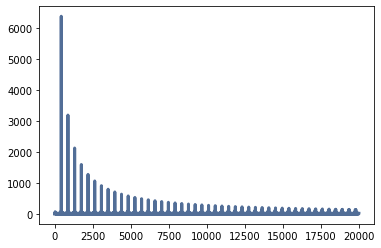

In [6]:
sawtooth.make_spectrum().plot()

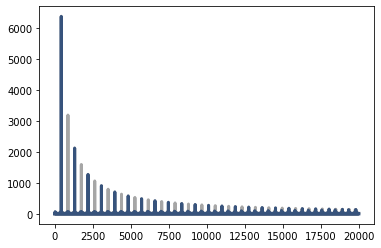

In [7]:
sawtooth.make_spectrum().plot(color='gray')
square = thinkdsp.SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square.make_spectrum().plot()

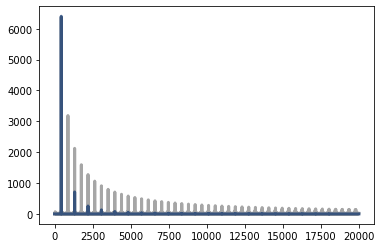

In [8]:
sawtooth.make_spectrum().plot(color='gray')
triangle = thinkdsp.TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=40000)
triangle.make_spectrum().plot()

Solution 3

In [9]:
square = thinkdsp.SquareSignal(1100).make_wave(duration=0.5, framerate=10000)

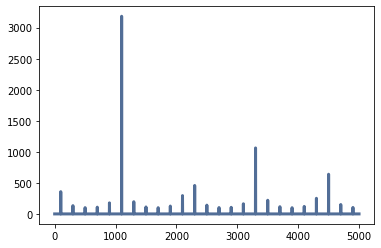

In [10]:
square.make_spectrum().plot()

In [11]:
square.make_audio()

In [12]:
thinkdsp.SinSignal(300).make_wave(duration=0.5, framerate=10000).make_audio()

Solution 4

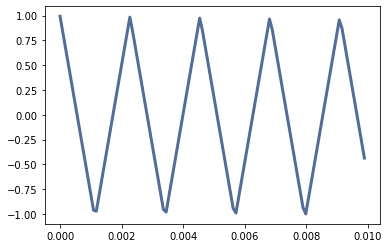

In [13]:
triangle = thinkdsp.TriangleSignal().make_wave(duration=0.01)
triangle.plot()

In [14]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

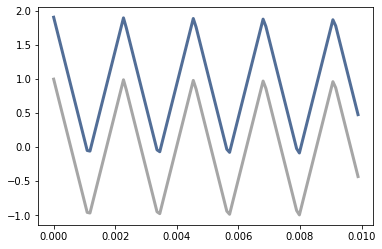

In [15]:
spectrum.hs[0] = 100
triangle.plot(color='gray')
spectrum.make_wave().plot()

Solution 5

In [16]:
def filter_spectrum(spectrum):
    spectrum.hs /= spectrum.fs
    spectrum.hs[0] = 0

In [17]:
wave = thinkdsp.TriangleSignal(freq=440).make_wave(duration=0.5)
wave.make_audio()

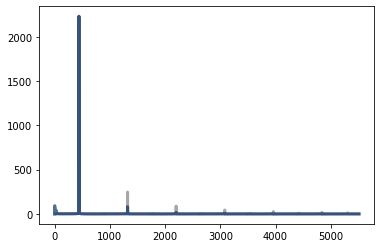

In [18]:
high = 10000
spectrum = wave.make_spectrum()
spectrum.plot(high=high, color='gray')
filter_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=high)

In [19]:
filtered = spectrum.make_wave()
filtered.make_audio()

Solution 6

In [20]:
freq = 500
signal = thinkdsp.SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

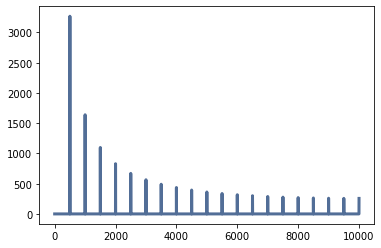

In [21]:
spectrum = wave.make_spectrum()
spectrum.plot()

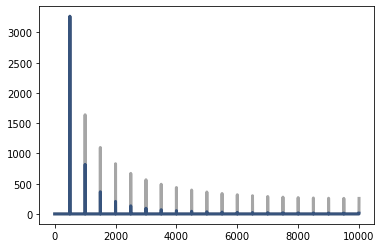

In [22]:
spectrum.plot(color='gray')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()

In [23]:
wave = spectrum.make_wave()
wave.make_audio()

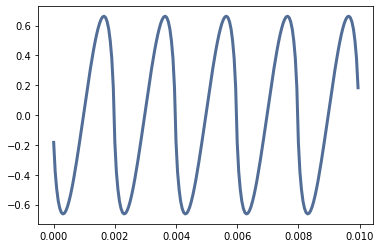

In [24]:
wave.segment(duration=0.01).plot()

In [25]:
freqs = np.arange(500, 9500, 500)
amps = 1 / freqs**2
signal = sum(thinkdsp.CosSignal(freq, amp) for freq, amp in zip(freqs, amps))
signal

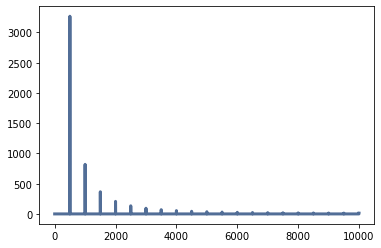

In [26]:
spectrum = wave.make_spectrum()
spectrum.plot()

In [27]:
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

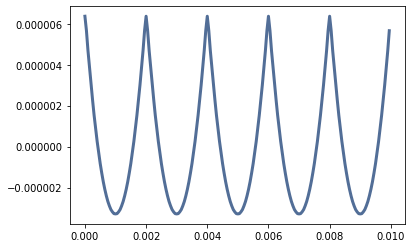

In [28]:
wave.segment(duration=0.01).plot()

In [29]:
wave = thinkdsp.ParabolicSignal(freq=500).make_wave(duration=0.5, framerate=20000)
wave.make_audio()

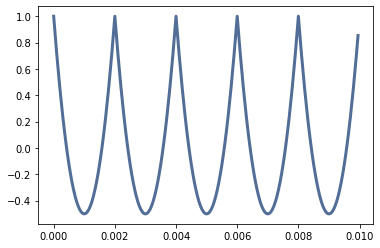

In [30]:
wave.segment(duration=0.01).plot()

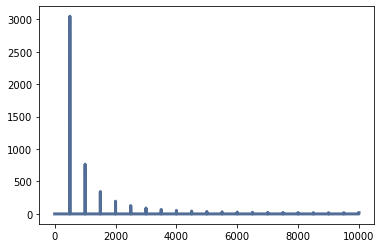

In [31]:
spectrum = wave.make_spectrum()
spectrum.plot()